<h1><center>College Major Infographics</center></h1>

# Index
---

## 1. Project

- Project Description
- Team Members

## 2. Data 

- Source Location
- Table Descriptions
- Variable Descriptions


## 3. Preliminary Questions

- What are the top 5 majors and major categories that has the highest percentage of graduates who landed on a job not requiring a college degree or a low_wage service jobs.
- Top 5 majors with biggest difference between graduate students’ median salary and undergraduate students’ median salary. (In terms of absolute value and percentage separately)
- Which major’s graduate students have the highest full-time employment rate, part-time employment rate and unemployment rate.
- Which major category has the highest and lowest share of women graduates. And inside those two categories, which major has the highest and lowest median salary level separately?
- Which major(including undergraduate and graduate student) gets the most and least median salary. Which major's salary has the biggest difference between 75th percentile and 25th percentile?
- Which category of "STEM" majors receives the highest salary after graduation? And inside this field, specifically which major reveives the highest median salary?
- Which category of "STEM" majors receives the lowest salary after graduation? And inside this field, specifically which major receives the lowest median salary?


# Project
---
### Project Description
> We wanted to create tools and resources to help university students determine which major has characteristics that best fit their interest. By analysing different majors their economic and demographic qualties such as median income, gender breakdown, unemployment rate, and other, we were able to create clear dashboards to give students insights on what differentiates majors asife from the content.

### Team Members

##### Song Lin 
- Supervised overall Project execution

##### Yigit Demiralp
- Developed python recommender function

##### Linghan Leng
- Devloped user dashboard and visualization

##### Bosoo Kim
- Created presentation and managed project timeline

##### Chiebuka Onwuzurike
- Supported Tableau and Python integration of data



# Data

All data is from American Community Survey 2010-2012 Public Use Microdata Series.

Download data here: http://www.census.gov/programs-surveys/acs/data/pums.html

Documentation here: http://www.census.gov/programs-surveys/acs/technical-documentation/pums.html

`majors-list.csv`
- List of majors with their FOD1P codes and major categories.
- Major categories are from Carnevale et al, "What's It Worth?: The Economic Value of College Majors." Georgetown University Center on Education and the Workforce, 2011. http://cew.georgetown.edu/whatsitworth

Three main data files:
- `all-ages.csv`
- `recent-grads.csv` (ages <28)
- `grad-students.csv` (ages 25+)

All contain basic earnings and labor force information. `recent-grads.csv` contains a more detailed breakdown, including by sex and by the type of job they got. `grad-students.csv` contains details on graduate school attendees.

Headers for `recent-grads.csv` are shown below:

Header | Description
---|---------
`Rank` | Rank by median earnings
`Major_code` | Major code, FO1DP in ACS PUMS
`Major` | Major description
`Major_category` | Category of major from Carnevale et al
`Total` | Total number of people with major
`Sample_size` | Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
`Men` | Male graduates
`Women` | Female graduates
`ShareWomen` | Women as share of total
`Employed` | Number employed (ESR == 1 or 2)
`Full_time` | Employed 35 hours or more
`Part_time` | Employed less than 35 hours
`Full_time_year_round` | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
`Unemployed` | Number unemployed (ESR == 3)
`Unemployment_rate` | Unemployed / (Unemployed + Employed)
`Median` | Median earnings of full-time, year-round workers
`P25th` | 25th percentile of earnings
`P75th` | 75th percentile of earnings
`College_jobs` | Number with job requiring a college degree
`Non_college_jobs` | Number with job not requiring a college degree
`Low_wage_jobs` | Number in low-wage service jobs


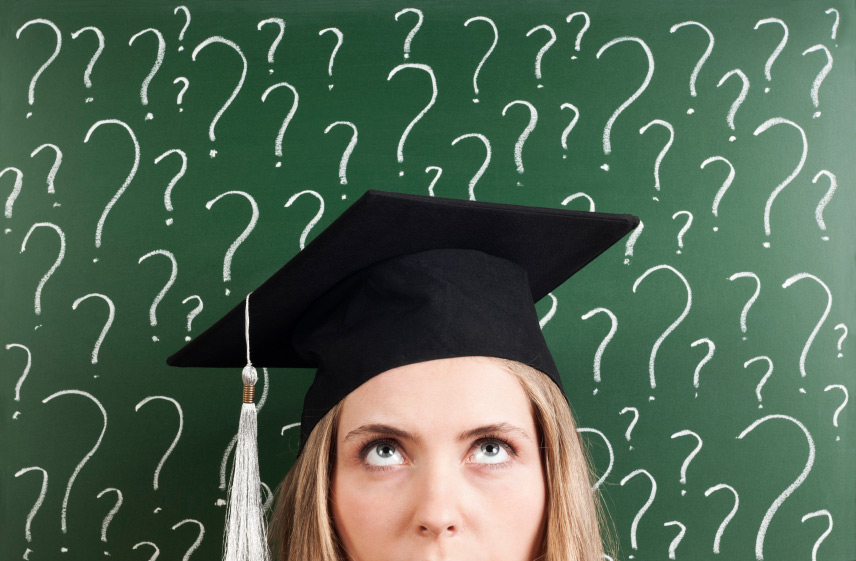

In [1]:
from IPython.display import Image
 # Load image from local storage
Image(filename = "grad-cap-tassel-question-marks.png", width = 600, height = 300)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as tkr
import warnings

warnings.filterwarnings('ignore')

sns.set_palette("mako_r")
pal= 'mako_r'

#plt.style.use('fivethirtyeight')

grads_students = pd.read_csv('grad-students.csv')
major_list = pd.read_csv('majors-list.csv')
all_ages = pd.read_csv('all-ages.csv')
recent_grads = pd.read_csv('recent-grads.csv')
women_stem = pd.read_csv('women-stem.csv')

# Adding share of women column to grad school dataset
grads_students = grads_students.merge(recent_grads[['Major_code', 'ShareWomen']], on='Major_code')
all_ages = all_ages.merge(grads_students[['Major_code','Grad_premium','ShareWomen']], on='Major_code')
recent_grads = recent_grads.merge(grads_students[['Major_code','Grad_premium']], on='Major_code')

# Preliminary Data Exploration
---

### 1. What are the top 5 majors and major categories that has the highest percentage of graduates who landed on a job not requiring a college degree or a low_wage service jobs.

In [3]:
pd.set_option('display.max_columns',None)
recent_grads['Non_college_jobs_Per'] = recent_grads['Non_college_jobs'] / recent_grads['Total']
recent_grads['Low_wage_jobs_Per'] = recent_grads['Low_wage_jobs'] / recent_grads['Total']
print(recent_grads[['Major', 'Non_college_jobs_Per']].sort_values(by='Non_college_jobs_Per', ascending = False))

                                                 Major  Non_college_jobs_Per
160             COSMETOLOGY SERVICES AND CULINARY ARTS              0.702569
39   NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...              0.697070
75   ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...              0.681314
51                          MEDICAL ASSISTING SERVICES              0.624652
166                             DRAMA AND THEATER ARTS              0.585285
..                                                 ...                   ...
6                                    ACTUARIAL SCIENCE              0.083135
3            NAVAL ARCHITECTURE AND MARINE ENGINEERING              0.081081
33              GEOLOGICAL AND GEOPHYSICAL ENGINEERING              0.069444
73                               MILITARY TECHNOLOGIES              0.000000
21                                        FOOD SCIENCE                   NaN

[173 rows x 2 columns]


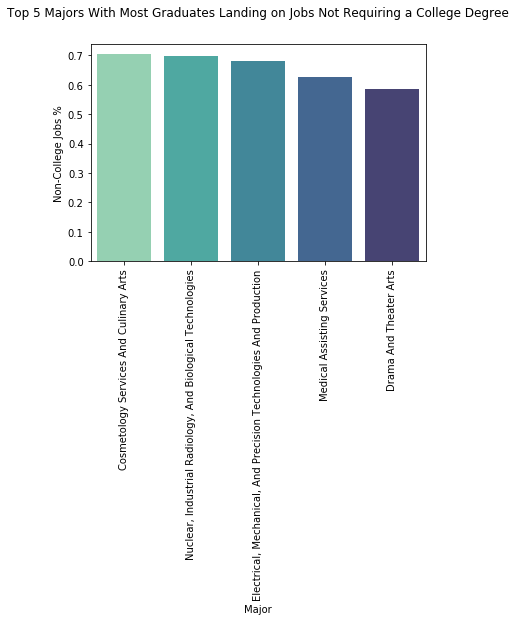

In [4]:
top5_Majors = recent_grads.sort_values(by='Non_college_jobs_Per', ascending = False)[:5]
top5_Majors['Major'] = top5_Majors['Major'].str.title()
g = sns.barplot(data = top5_Majors, x = 'Major', y = 'Non_college_jobs_Per')
g.set_title('Top 5 Majors With Most Graduates Landing on Jobs Not Requiring a College Degree',y=1.1)

plt.ylabel('Non-College Jobs %')
plt.xticks(rotation = 90);
plt.show()

In [5]:
pd.set_option('display.max_columns',None)
print(recent_grads[['Major', 'Low_wage_jobs_Per']].sort_values(by='Low_wage_jobs_Per', ascending = False))

                                         Major  Low_wage_jobs_Per
160     COSMETOLOGY SERVICES AND CULINARY ARTS           0.300951
166                     DRAMA AND THEATER ARTS           0.255913
32                     MISCELLANEOUS FINE ARTS           0.226048
170                        CLINICAL PSYCHOLOGY           0.219168
159                                STUDIO ARTS           0.211227
..                                         ...                ...
73                       MILITARY TECHNOLOGIES           0.000000
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING           0.000000
2                    METALLURGICAL ENGINEERING           0.000000
55                   SCHOOL STUDENT COUNSELING           0.000000
21                                FOOD SCIENCE                NaN

[173 rows x 2 columns]


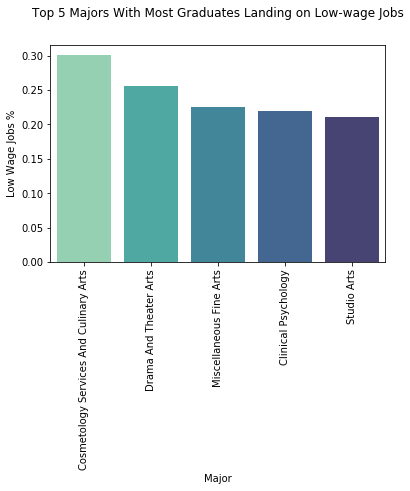

In [6]:
top5_Majors = recent_grads.sort_values(by='Low_wage_jobs_Per', ascending = False)[:5]
top5_Majors['Major'] = top5_Majors['Major'].str.title()
g = sns.barplot(data = top5_Majors, x = 'Major', y = 'Low_wage_jobs_Per')
g.set_title('Top 5 Majors With Most Graduates Landing on Low-wage Jobs',y=1.1)

plt.ylabel('Low Wage Jobs %')
plt.xticks(rotation = 90);
plt.show()

In [7]:
df = pd.DataFrame(recent_grads.groupby('Major_category')['Total'].sum())
df['Low_wage_Total'] = recent_grads.groupby('Major_category')['Low_wage_jobs'].sum()
df['Non_college_Total'] = recent_grads.groupby('Major_category')['Non_college_jobs'].sum()
df['Low_wage_Per_cat'] = df['Low_wage_Total'] / df['Total']
df['Non_college_Per_cat'] = df['Non_college_Total'] / df['Total']
df.sort_values(by='Low_wage_Per_cat', ascending=False)

,Total,Low_wage_Total,Non_college_Total,Low_wage_Per_cat,Non_college_Per_cat
Major_category,,,,,
Arts,357130.0,60116,163720,0.168331,0.458433
Humanities & Liberal Arts,713468.0,94240,276532,0.132087,0.387589
Communications & Journalism,392601.0,49595,172992,0.126324,0.440631
Psychology & Social Work,481007.0,56246,169366,0.116934,0.352107
Industrial Arts & Consumer Services,229792.0,26590,104620,0.115713,0.455281
Law & Public Policy,179107.0,20720,100024,0.115685,0.558459
Agriculture & Natural Resources,75620.0,7899,34491,0.104456,0.456109
Social Science,529966.0,54180,190246,0.102233,0.358978
Business,1302376.0,126788,496570,0.097351,0.381280


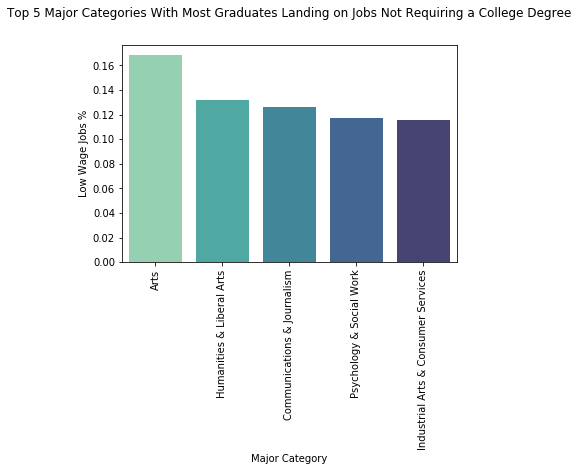

In [8]:
Majorcat = df.sort_values(by='Low_wage_Per_cat', ascending = False)[:5]
Majorcat.reset_index(inplace=True)
g = sns.barplot(data = Majorcat, x = 'Major_category', y = 'Low_wage_Per_cat')
g.set_title('Top 5 Major Categories With Most Graduates Landing on Jobs Not Requiring a College Degree',y=1.1)
plt.xlabel('Major Category')
plt.ylabel('Low Wage Jobs %')
plt.xticks(rotation = 90);
plt.show()


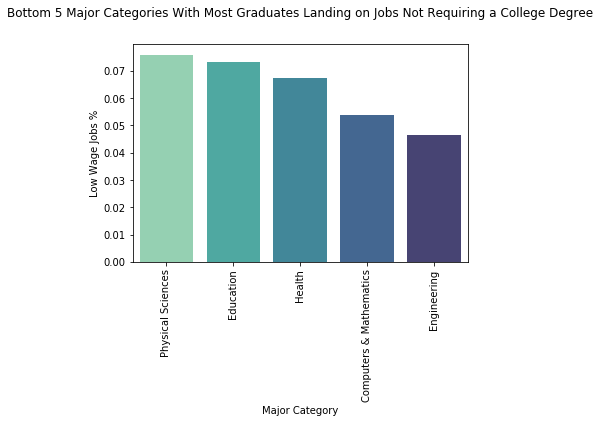

In [9]:
Majorcat = df.sort_values(by='Low_wage_Per_cat', ascending = False)[-5:]
Majorcat.reset_index(inplace=True)
g = sns.barplot(data = Majorcat, x = 'Major_category', y = 'Low_wage_Per_cat')
g.set_title('Bottom 5 Major Categories With Most Graduates Landing on Jobs Not Requiring a College Degree',y=1.1)
plt.xlabel('Major Category')
plt.ylabel('Low Wage Jobs %')
plt.xticks(rotation = 90);
plt.show()

In [10]:
df.sort_values(by='Non_college_Per_cat', ascending=False)

,Total,Low_wage_Total,Non_college_Total,Low_wage_Per_cat,Non_college_Per_cat
Major_category,,,,,
Law & Public Policy,179107.0,20720,100024,0.115685,0.558459
Arts,357130.0,60116,163720,0.168331,0.458433
Agriculture & Natural Resources,75620.0,7899,34491,0.104456,0.456109
Industrial Arts & Consumer Services,229792.0,26590,104620,0.115713,0.455281
Communications & Journalism,392601.0,49595,172992,0.126324,0.440631
Humanities & Liberal Arts,713468.0,94240,276532,0.132087,0.387589
Business,1302376.0,126788,496570,0.097351,0.381280
Social Science,529966.0,54180,190246,0.102233,0.358978
Psychology & Social Work,481007.0,56246,169366,0.116934,0.352107


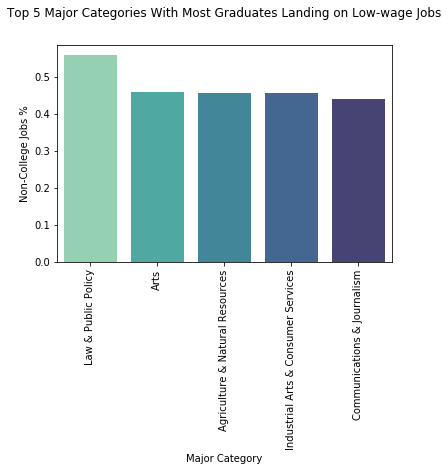

In [11]:
Majorcat = df.sort_values(by='Non_college_Per_cat', ascending = False)[:5]
Majorcat.reset_index(inplace=True)
g = sns.barplot(data = Majorcat, x = 'Major_category', y = 'Non_college_Per_cat')
g.set_title('Top 5 Major Categories With Most Graduates Landing on Low-wage Jobs',y=1.1)
plt.xlabel('Major Category')
plt.ylabel('Non-College Jobs %')
plt.xticks(rotation = 90);
plt.show()

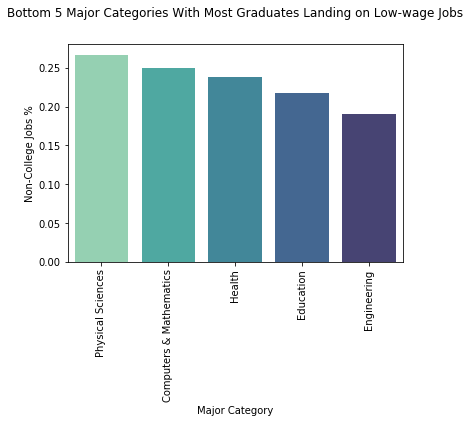

In [12]:
Majorcat = df.sort_values(by='Non_college_Per_cat', ascending = False)[-5:]
Majorcat.reset_index(inplace=True)
g = sns.barplot(data = Majorcat, x = 'Major_category', y = 'Non_college_Per_cat')
g.set_title('Bottom 5 Major Categories With Most Graduates Landing on Low-wage Jobs',y=1.1)
plt.xlabel('Major Category')
plt.ylabel('Non-College Jobs %')
plt.xticks(rotation = 90);
plt.show()

### 2. Top 5 majors with biggest difference between graduate students’ median salary and undergraduate students’ median salary. (In terms of absolute value and percentage separately)

In [13]:
pd.set_option('display.max_columns',None)
grads_students['abs_diff'] = grads_students['Grad_median'] - grads_students['Nongrad_median']
print(grads_students[['Major', 'Grad_premium', 'abs_diff']].sort_values(by='Grad_premium', ascending=False)[:5])


                                       Major  Grad_premium  abs_diff
170  HEALTH AND MEDICAL PREPARATORY PROGRAMS      1.647059   84000.0
160                                  ZOOLOGY      1.000000   55000.0
155                               PHYSIOLOGY      0.800000   40000.0
152                                  BIOLOGY      0.759259   41000.0
164                     BIOCHEMICAL SCIENCES      0.745455   41000.0


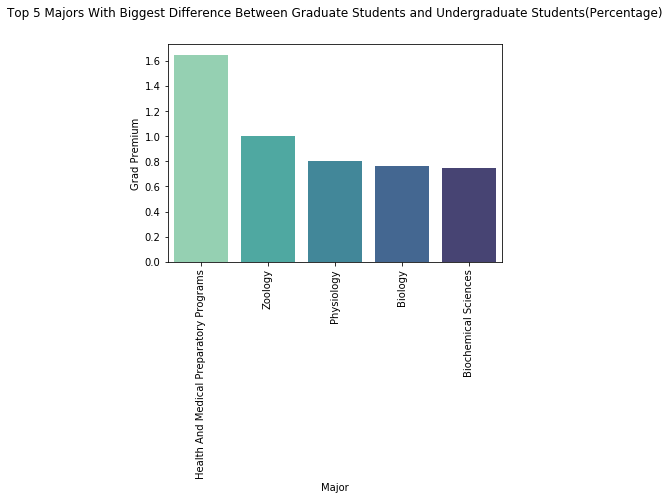

In [14]:
top5_Majors = grads_students.sort_values(by='Grad_premium', ascending = False)[:5]
top5_Majors['Major'] = top5_Majors['Major'].str.title()
g = sns.barplot(data = top5_Majors, x = 'Major', y = 'Grad_premium')

plt.ylabel('Grad Premium')
g.set_title('Top 5 Majors With Biggest Difference Between Graduate Students and Undergraduate Students(Percentage)',y=1.1)
plt.xticks(rotation = 90);
plt.show()

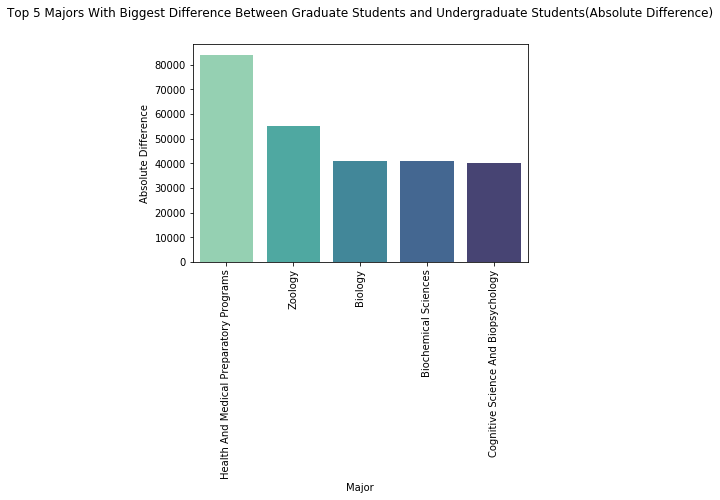

In [15]:
top5_Majors = grads_students.sort_values(by='abs_diff', ascending = False)[:5]
top5_Majors['Major'] = top5_Majors['Major'].str.title()
g = sns.barplot(data = top5_Majors, x = 'Major', y = 'abs_diff')
g.set_title('Top 5 Majors With Biggest Difference Between Graduate Students and Undergraduate Students(Absolute Difference)',y=1.1)

plt.ylabel('Absolute Difference')
plt.xticks(rotation = 90);
plt.show()

                                         Major  Grad_premium  abs_diff
39                   ARCHITECTURAL ENGINEERING     -0.025000   -2000.0
81                   MISCELLANEOUS AGRICULTURE     -0.018182   -1000.0
52                       PETROLEUM ENGINEERING     -0.015873   -2000.0
69                                SOIL SCIENCE      0.000000       0.0
88   NAVAL ARCHITECTURE AND MARINE ENGINEERING      0.020000    2000.0
..                                         ...           ...       ...
164                       BIOCHEMICAL SCIENCES      0.745455   41000.0
152                                    BIOLOGY      0.759259   41000.0
155                                 PHYSIOLOGY      0.800000   40000.0
160                                    ZOOLOGY      1.000000   55000.0
170    HEALTH AND MEDICAL PREPARATORY PROGRAMS      1.647059   84000.0

[173 rows x 3 columns]


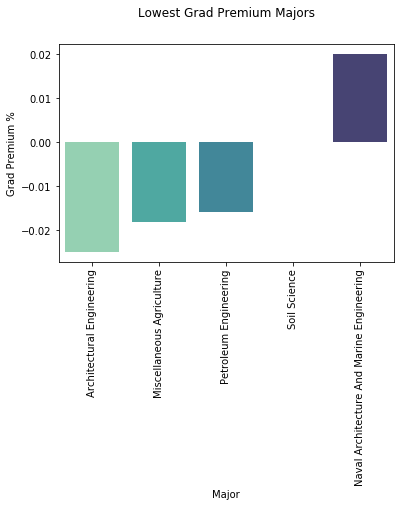

In [16]:
pd.set_option('display.max_columns',None)
grads_students['abs_diff'] = grads_students['Grad_median'] - grads_students['Nongrad_median']
print(grads_students[['Major', 'Grad_premium', 'abs_diff']].sort_values(by='Grad_premium', ascending=True))

bottom5_Majors = grads_students.sort_values(by='Grad_premium', ascending = True)[:5]
bottom5_Majors['Major'] = bottom5_Majors['Major'].str.title()
g = sns.barplot(data = bottom5_Majors, x = 'Major', y = 'Grad_premium')

plt.title('Lowest Grad Premium Majors',y=1.1)
plt.xlabel('Major')
plt.ylabel('Grad Premium %')

plt.xticks(rotation = 90);
plt.show()

### Analysis:
The major with highest grad premium is 'Health and Medical Preparatory Programs', the main reason is the difference of whether graduating from a medical school. Graduates earn a median salary of 135,000 dollars if they successfully go on to medical school or other graduate programs, but just 51,000 dollars if they don’t. Other biology and science majors also enjoy huge premiums, likely because many of them, too, go on to medical school.\
Link:https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/

### 3. Which major’s graduate students have the highest full-time employment rate, part-time employment rate and unemployment rate.

In [17]:
f = grads_students['Grad_employed']/grads_students['Grad_total']
p = (grads_students['Grad_employed']-grads_students['Grad_full_time_year_round'])/grads_students['Grad_total']
grads_students['full_time_rate']=f
grads_students['part_time_rate']=p

In [18]:
top_full_time = grads_students.sort_values(by='full_time_rate',ascending=False).head(10)
top_full_time.head(1)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,ShareWomen,abs_diff,full_time_rate,part_time_rate
74,2407,COMPUTER ENGINEERING,Engineering,82102,1806,73147,65371,1592,0.021301,97000.0,75000,130000.0,141270,119738,106089,6639,0.052533,81000.0,60000,110000.0,0.367557,0.197531,0.199413,16000.0,0.890928,0.094711


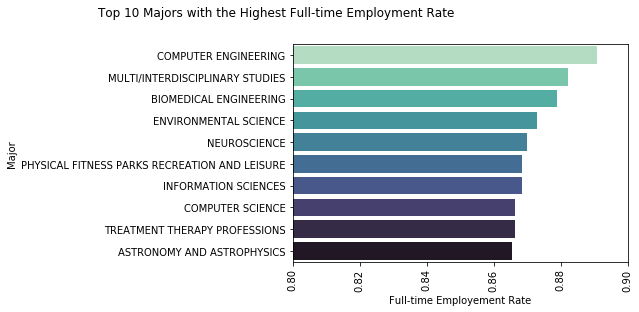

In [19]:
g = sns.barplot(data=top_full_time,y='Major',x='full_time_rate',order=top_full_time.sort_values('full_time_rate',ascending=False).Major, palette= pal)
g.set_xlabel('Full-time Employement Rate')
g.set_xlim(0.8,0.9)
plt.xticks(rotation=90)
plt.title('Top 10 Majors with the Highest Full-time Employment Rate',x=-0.05,y=1.1);

In [20]:
top_part_time = grads_students.sort_values(by='part_time_rate',ascending=False).head(10)
top_part_time.head(1)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,ShareWomen,abs_diff,full_time_rate,part_time_rate
108,6002,MUSIC,Arts,205013,2759,150394,88436,6507,0.041472,60000.0,41000,85000.0,251339,174414,109664,8834,0.048208,46400.0,32000,70000.0,0.449243,0.293103,0.506721,13600.0,0.733583,0.302215


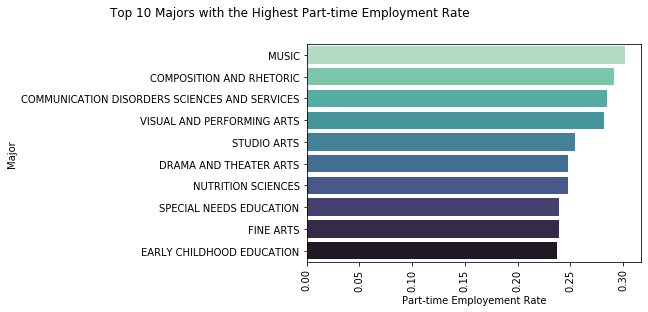

In [21]:
g = sns.barplot(data=top_part_time,y='Major',x='part_time_rate',order=top_part_time.sort_values('part_time_rate',ascending=False).Major, palette= pal)
g.set_xlabel('Part-time Employement Rate')
plt.title('Top 10 Majors with the Highest Part-time Employment Rate',x=-0.05,y=1.1)
plt.xticks(rotation=90);

In [22]:
top_unem = grads_students.sort_values(by='Grad_unemployment_rate',ascending=False).head(10)
top_unem.head(1)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,ShareWomen,abs_diff,full_time_rate,part_time_rate
11,5701,"ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLO...",Industrial Arts & Consumer Services,3187,45,1984,1481,319,0.138515,62000.0,40000,100000.0,14842,11921,9949,653,0.051933,50000.0,32400,75000.0,0.176771,0.24,0.232444,12000.0,0.622529,0.157829


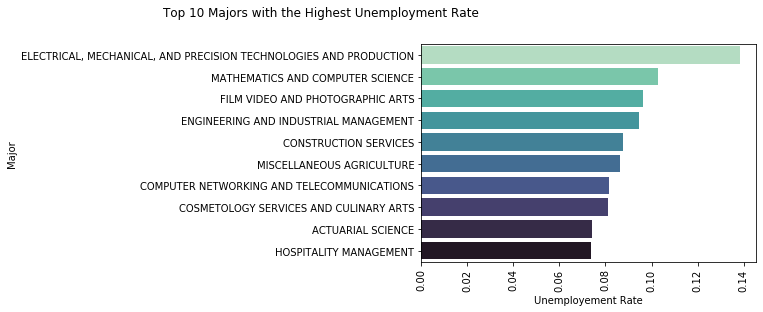

In [23]:
g = sns.barplot(data=top_unem,y='Major',x='Grad_unemployment_rate',order=top_unem.sort_values('Grad_unemployment_rate',ascending=False).Major, palette= pal)
g.set_xlabel('Unemployement Rate')
plt.title('Top 10 Majors with the Highest Unemployment Rate',x=-0.3,y=1.1)
plt.xticks(rotation=90);

### 4. Which major category has the highest and lowest share of women graduates. And inside those two categories, which major has the highest and lowest median salary level separately?

In [24]:
major_category_share_women = recent_grads.groupby('Major_category', sort=False).mean().reset_index()
major_category_share_women = major_category_share_women.sort_values(by = 'ShareWomen', ascending = False)

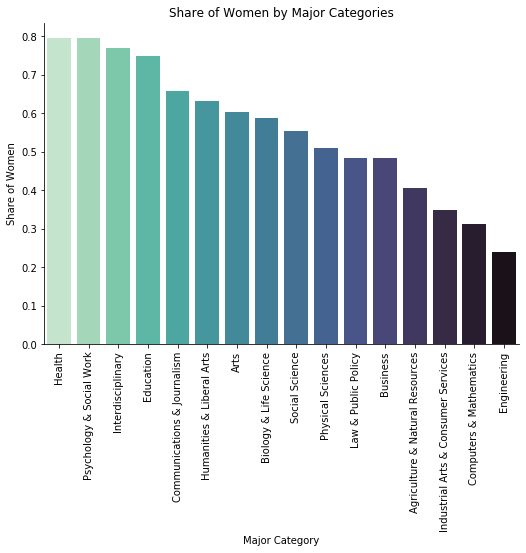

In [25]:
sns.catplot(data= major_category_share_women, x= 'Major_category', y='ShareWomen', kind= 'bar', aspect = 1.5, palette= pal)

plt.title('Share of Women by Major Categories')
plt.xlabel('Major Category')
plt.ylabel('Share of Women')
plt.xticks(rotation = 90)
plt.show()

In [26]:
# Major category with highest share of women
major_category_share_women[['ShareWomen','Median']][:1]

,ShareWomen,Median
8,0.795152,36825.0


In [27]:
major_category_education = recent_grads[recent_grads['Major_category'] == 'Education'].sort_values(by = 'Median', ascending = False)

In [28]:
# Major in Education with highest median income
major_category_education[['Major','Median','ShareWomen']][:1]

,Major,Median,ShareWomen
55,SCHOOL STUDENT COUNSELING,41000,0.854523


In [29]:
# Major in Education with lowest median income
major_category_education[['Major','Median','ShareWomen']][-1:]

,Major,Median,ShareWomen
172,LIBRARY SCIENCE,22000,0.87796


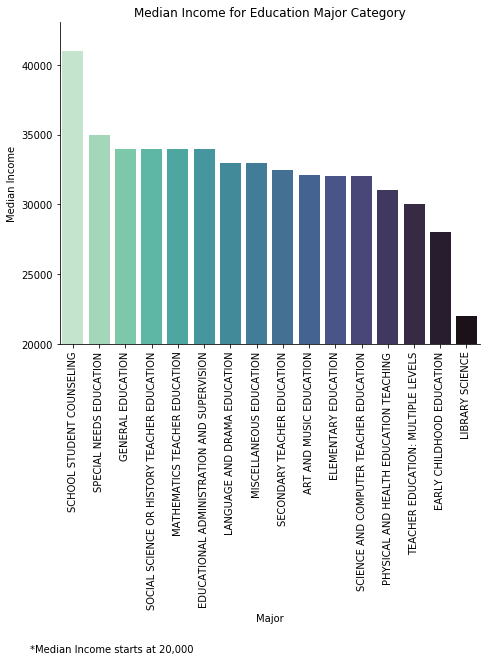

In [30]:
sns.catplot(data= major_category_education, x= 'Major', y='Median', kind= 'bar', aspect= 1.5, palette= pal)

plt.ylim(20000, None)
#sns.plt.xlim(0, None)

plt.annotate('*Median Income starts at 20,000', (0,0), (-30, -300), xycoords='axes fraction', textcoords='offset points', va='top')
plt.title('Median Income for Education Major Category')
plt.xlabel('Major')
plt.ylabel('Median Income')
plt.xticks(rotation = 90)
plt.show()

In [31]:
# Major category with lowest share of women
major_category_share_women[['ShareWomen','Median']][-1:]

,ShareWomen,Median
0,0.238889,57382.758621


In [32]:
major_category_engineering = recent_grads[recent_grads['Major_category'] == 'Engineering'].sort_values(by = 'Median', ascending = False)

In [33]:
# Major in Engineering with highest median income
major_category_engineering[['Major','Median','ShareWomen']][:1]

,Major,Median,ShareWomen
0,PETROLEUM ENGINEERING,110000,0.120564


In [34]:
# Major in Engineering with lowest median income
major_category_engineering[['Major','Median','ShareWomen']][-1:]

,Major,Median,ShareWomen
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,40000,0.077453


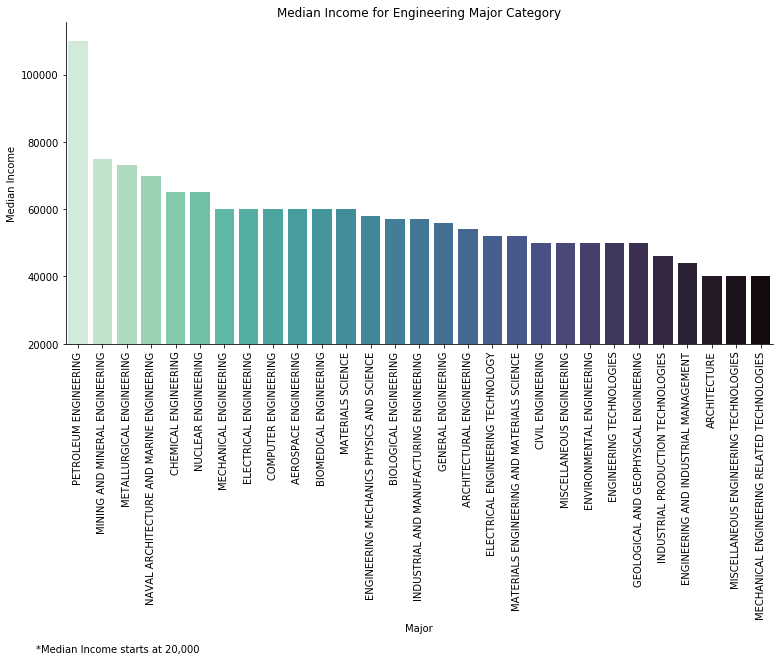

In [35]:
sns.catplot(data= major_category_engineering, x= 'Major', y='Median', kind= 'bar', aspect= 2.5, palette= pal)

plt.annotate('*Median Income starts at 20,000', (0,0), (-30, -300), xycoords='axes fraction', textcoords='offset points', va='top')
plt.ylim(20000, None)
plt.title('Median Income for Engineering Major Category')
plt.xlabel('Major')
plt.ylabel('Median Income')
plt.xticks(rotation = 90)
plt.show()

#top_median["Major"].replace({"PETROLEUM ENGINEERING": "PETROLEUM", "NAVAL ARCHITECTURE AND MARINE ENGINEERING": "NAVAL ARCHITECTURE AND MARINE", "NUCLEAR ENGINEERING": "NUCLEAR", "MINING AND MINERAL ENGINEERING": "MINING AND MINERAL"}, inplace=True)

### 5. Which major(including undergraduate and graduate student) gets the most and least median salary. Which major's salary has the biggest difference between 75th percentile and 25th percentile?


Major with highest median income

In [36]:
all_ages.sort_values(by='Median', ascending = False)[:1]


,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0,-0.015873,0.120564


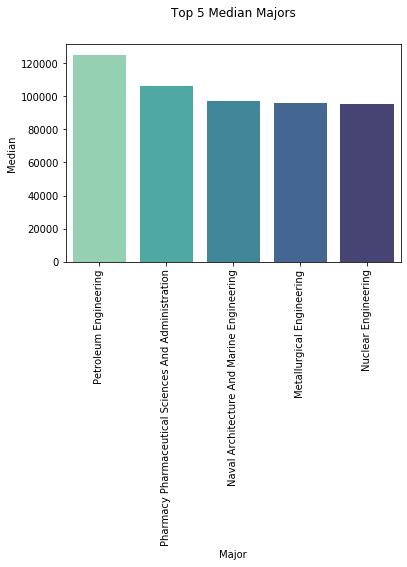

In [37]:
top5_Majors = all_ages.sort_values(by='Median', ascending = False)[:5]
top5_Majors['Major'] = top5_Majors['Major'].str.title()
g = sns.barplot(data = top5_Majors, x = 'Major', y = 'Median')

plt.xticks(rotation = 90);
plt.title('Top 5 Median Majors', y = 1.1)
plt.show()


Major with lowest median income

In [38]:
all_ages.sort_values(by='Median')[:1]


,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen
88,3611,NEUROSCIENCE,Biology & Life Science,13676,8987,5446,665,0.068898,35000,28000,52000.0,0.45,0.638147


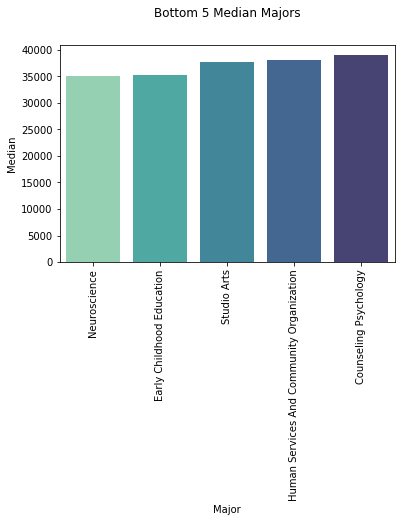

In [39]:
bottom5_Majors = all_ages.sort_values(by='Median')[:5]
bottom5_Majors['Major'] = bottom5_Majors['Major'].str.title()
g = sns.barplot(data = bottom5_Majors, x = 'Major', y = 'Median')
plt.title('Bottom 5 Median Majors', y = 1.1)
plt.xticks(rotation = 90);

plt.show()

Major with the lowest variation between the 25th and the 75th percentile:


In [40]:
all_ages['Percentile_Variation'] = all_ages['P75th'] - all_ages['P25th']
all_ages.sort_values(by='Percentile_Variation')[:1]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen,Percentile_Variation
27,2303,SCHOOL STUDENT COUNSELING,Education,2396,1492,1093,169,0.101746,41000,33200,50000.0,0.333333,0.854523,16800.0


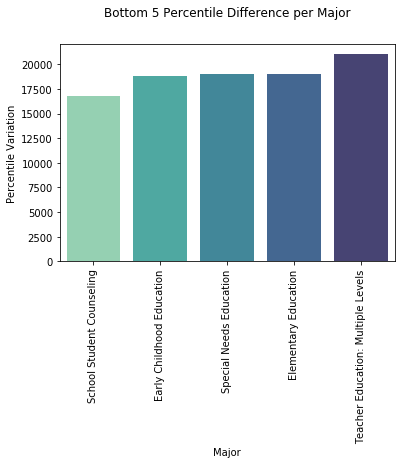

In [41]:
bottom_percentiles = all_ages.sort_values(by='Percentile_Variation')[:5]
bottom_percentiles['Major'] = bottom_percentiles['Major'].str.title()
g = sns.barplot(data = bottom_percentiles, x = 'Major', y = 'Percentile_Variation')

plt.ylabel('Percentile Variation')
plt.title('Bottom 5 Percentile Difference per Major', y = 1.1)
plt.xticks(rotation = 90);
plt.show()

Major with the highest variation between the 25th and the 75th percentile

In [42]:
all_ages['Percentile_Variation'] = all_ages['P75th'] - all_ages['P25th']
all_ages.sort_values(by='Percentile_Variation', ascending = False)[:1]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen,Percentile_Variation
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0,-0.015873,0.120564,135000.0


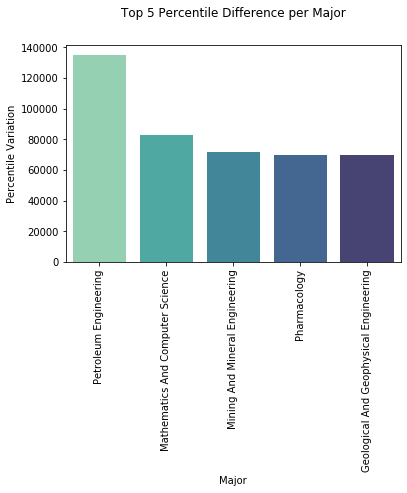

In [43]:
top_percentiles = all_ages.sort_values(by='Percentile_Variation', ascending = False)[:5]
top_percentiles['Major'] = top_percentiles['Major'].str.title()


g = sns.barplot(data = top_percentiles, x = 'Major', y = 'Percentile_Variation')
plt.ylabel('Percentile Variation')
plt.title('Top 5 Percentile Difference per Major', y = 1.1)
plt.xticks(rotation = 90);
plt.show()

### 6. Which category of "STEM" majors receives the highest salary after graduation? And inside this field, specifically which major reveives the highest median salary? 

In [44]:
merged = pd.merge(all_ages, women_stem, left_on='Major_category', right_on='Major_category', how='outer')
merged
merged.dropna(inplace=True)
merged.head()

,Major_code_x,Major_x,Major_category,Total_x,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median_x,P25th,P75th,Grad_premium,ShareWomen_x,Percentile_Variation,Rank,Major_code_y,Major_y,Total_y,Men,Women,ShareWomen_y,Median_y
10,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,36.0,3607.0,PHARMACOLOGY,1762.0,515.0,1247.0,0.707719,45000.0
11,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,43.0,4006.0,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,3831.0,1667.0,2164.0,0.564866,41000.0
12,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,48.0,3605.0,GENETICS,3635.0,1761.0,1874.0,0.515543,40000.0
13,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,49.0,3603.0,MOLECULAR BIOLOGY,18300.0,7426.0,10874.0,0.594208,40000.0
14,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,52.0,3606.0,MICROBIOLOGY,15232.0,6383.0,8849.0,0.580948,38000.0


In [45]:
stem_category = merged.groupby('Major_category')[['Median_x']].mean()
stem_category = stem_category.sort_values('Median_x', ascending=False).reset_index()
stem_category

,Major_category,Median_x
0,Engineering,77758.620690
1,Computers & Mathematics,66272.727273
2,Physical Sciences,62400.000000
3,Health,56458.333333
4,Biology & Life Science,50821.428571


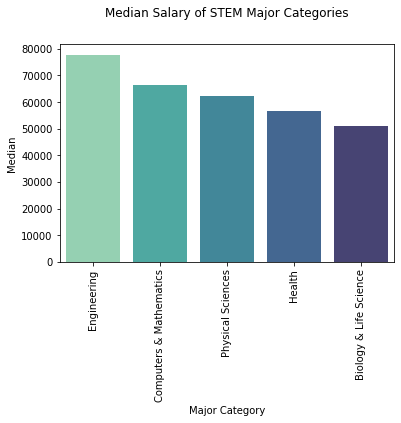

In [46]:
# stem_category.plot(y='Median_x', use_index=True, kind='bar', legend=None)
g = sns.barplot(data = stem_category, x = 'Major_category', y = 'Median_x')
plt.title('Median Salary of STEM Major Categories',y=1.1)
plt.xlabel('Major Category')
plt.ylabel('Median')
plt.xticks(rotation = 90);

In [47]:
top_median = all_ages[(all_ages["Major_category"] == 'Engineering')].sort_values(by='Median', ascending=False)[:5]
top_median

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen,Percentile_Variation
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0,-0.015873,0.120564,135000.0
57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0,0.020000,0.107313,65000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0,0.020408,0.153037,58000.0
58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0,0.100000,0.144967,63000.0
56,2416,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,6419,366,0.047032,92000,52000,124000.0,0.052632,0.101852,72000.0


In [48]:
top_median = all_ages[(all_ages["Major_category"] == 'Engineering')].sort_values(by='Median', ascending=False)[:5]
top_median
top_median["Major"].replace({"PETROLEUM ENGINEERING": "PETROLEUM", "NAVAL ARCHITECTURE AND MARINE ENGINEERING": "NAVAL ARCHITECTURE AND MARINE", "NUCLEAR ENGINEERING": "NUCLEAR", "MINING AND MINERAL ENGINEERING": "MINING AND MINERAL"}, inplace=True)
top_median

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen,Percentile_Variation
59,2419,PETROLEUM,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0,-0.015873,0.120564,135000.0
57,2417,NAVAL ARCHITECTURE AND MARINE,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0,0.020000,0.107313,65000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0,0.020408,0.153037,58000.0
58,2418,NUCLEAR,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0,0.100000,0.144967,63000.0
56,2416,MINING AND MINERAL,Engineering,10746,7416,6419,366,0.047032,92000,52000,124000.0,0.052632,0.101852,72000.0


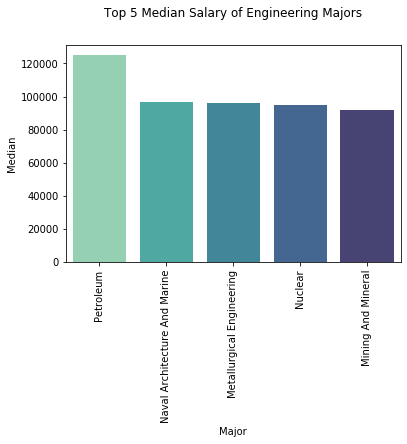

In [49]:
top_median['Major'] = top_median['Major'].str.title()
g = sns.barplot(data = top_median, x = 'Major', y = 'Median')
plt.xticks(rotation = 90);
plt.title('Top 5 Median Salary of Engineering Majors',y=1.1)
plt.show()

### 7. Which category of "STEM" majors receives the lowest salary after graduation? And inside this field, specifically which major receives the lowest median salary? 

In [50]:
merged = pd.merge(all_ages, women_stem, on='Major_category', how='inner')
merged.head()

,Major_code_x,Major_x,Major_category,Total_x,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median_x,P25th,P75th,Grad_premium,ShareWomen_x,Percentile_Variation,Rank,Major_code_y,Major_y,Total_y,Men,Women,ShareWomen_y,Median_y
0,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,36,3607,PHARMACOLOGY,1762,515,1247,0.707719,45000
1,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,43,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,3831,1667,2164,0.564866,41000
2,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,48,3605,GENETICS,3635,1761,1874,0.515543,40000
3,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,49,3603,MOLECULAR BIOLOGY,18300,7426,10874,0.594208,40000
4,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.05129,52000,38000,75000.0,0.236364,0.584556,37000.0,52,3606,MICROBIOLOGY,15232,6383,8849,0.580948,38000


In [51]:
stem_category = merged.groupby('Major_category')[['Median_x']].mean().reset_index()
stem_category.sort_values('Median_x')
stem_category = stem_category.sort_values('Median_x')
stem_category

,Major_category,Median_x
0,Biology & Life Science,50821.428571
3,Health,56458.333333
4,Physical Sciences,62400.000000
1,Computers & Mathematics,66272.727273
2,Engineering,77758.620690


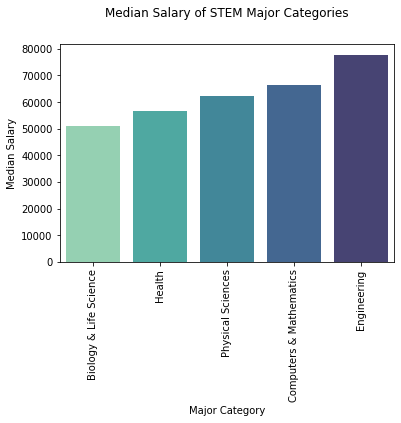

In [52]:
g = sns.barplot(data = stem_category, x = 'Major_category', y = 'Median_x')

plt.ylabel('Median Salary')
plt.xlabel('Major Category')
plt.title('Median Salary of STEM Major Categories',y=1.1)
plt.xticks(rotation = 90);

In [53]:
bot_median = all_ages[(all_ages["Major_category"] == 'Biology & Life Science')].sort_values(by='Median')[:5]
bot_median

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_premium,ShareWomen,Percentile_Variation
88,3611,NEUROSCIENCE,Biology & Life Science,13676,8987,5446,665,0.068898,35000,28000,52000.0,0.450000,0.638147,24000.0
81,3603,MOLECULAR BIOLOGY,Biology & Life Science,28197,20221,13366,1303,0.060537,45000,30000,70000.0,0.700000,0.594208,40000.0
82,3604,ECOLOGY,Biology & Life Science,45368,36708,25677,1888,0.048917,47500,32000,73000.0,0.273101,0.576360,41000.0
83,3605,GENETICS,Biology & Life Science,6362,4747,3498,206,0.041591,48000,33000,80000.0,0.392857,0.515543,47000.0
80,3602,BOTANY,Biology & Life Science,14135,9284,6333,327,0.034024,50000,32000,75000.0,0.400000,0.528969,43000.0


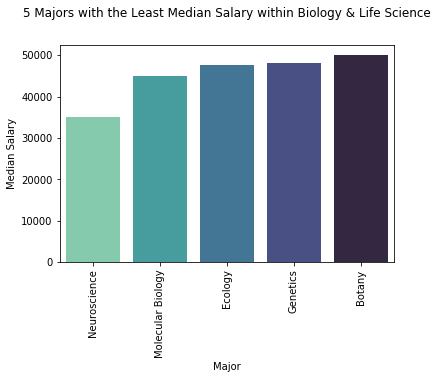

In [54]:
bot_median['Major'] = bot_median['Major'].str.title()
g = sns.barplot(data = bot_median, x = 'Major', y = 'Median', palette= pal)
g.set_ylabel('Median Salary')
g.set_title('5 Majors with the Least Median Salary within Biology & Life Science',y=1.1)
plt.xticks(rotation = 90);
plt.show()

# Major Category with Lowest Unemployment Rate

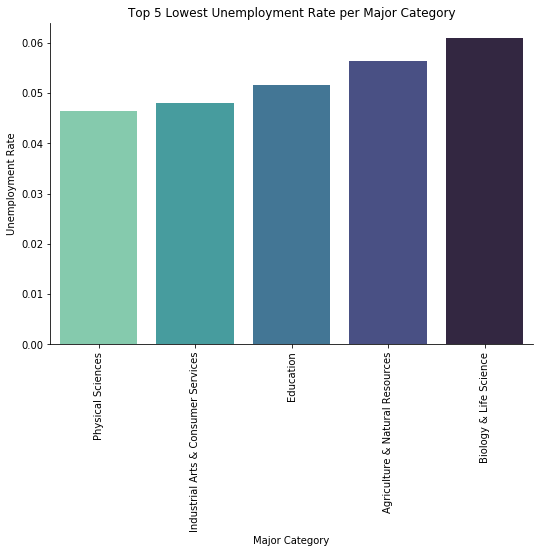

In [55]:
mpl.rcParams['font.size'] = 10
urate = recent_grads.groupby('Major_category').mean().reset_index().sort_values('Unemployment_rate', ascending= True)

g = sns.catplot(data= urate[:5], x= 'Major_category', y='Unemployment_rate', kind= 'bar', aspect= 1.5, palette= pal)

plt.title('Top 5 Lowest Unemployment Rate per Major Category')
plt.xlabel('Major Category')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation = 90)
plt.show()

# Major Category with Highest Percentage Low-wage Jobs

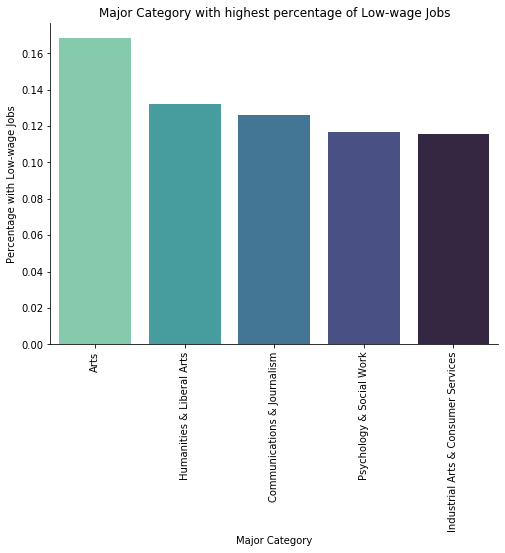

In [56]:
lowwage = recent_grads.groupby('Major_category').mean().reset_index()
lowwage['Low_wage_jobs_per'] = lowwage['Low_wage_jobs']/lowwage['Total']
lowwage = lowwage.sort_values('Low_wage_jobs_per', ascending= False)

sns.catplot(data= lowwage[:5], x= 'Major_category', y='Low_wage_jobs_per', kind= 'bar', aspect= 1.5, palette= pal)

plt.title('Major Category with highest percentage of Low-wage Jobs')
plt.xlabel('Major Category')
plt.ylabel('Percentage with Low-wage Jobs')
plt.xticks(rotation = 90)
plt.show()

# Clustering

In [57]:
recent_grads = recent_grads.dropna()
recent_grads['College_jobs_per'] = recent_grads['College_jobs']/recent_grads['Total'] 
recent_grads['Non_college_jobs_per'] = recent_grads['Non_college_jobs']/recent_grads['Total'] 
recent_grads['Low_wage_jobs_per'] = recent_grads['Low_wage_jobs']/recent_grads['Total'] 

## Cluster of 4 using 'Median','P25th','P75th','Unemployment_rate',and 'Grad_premium'

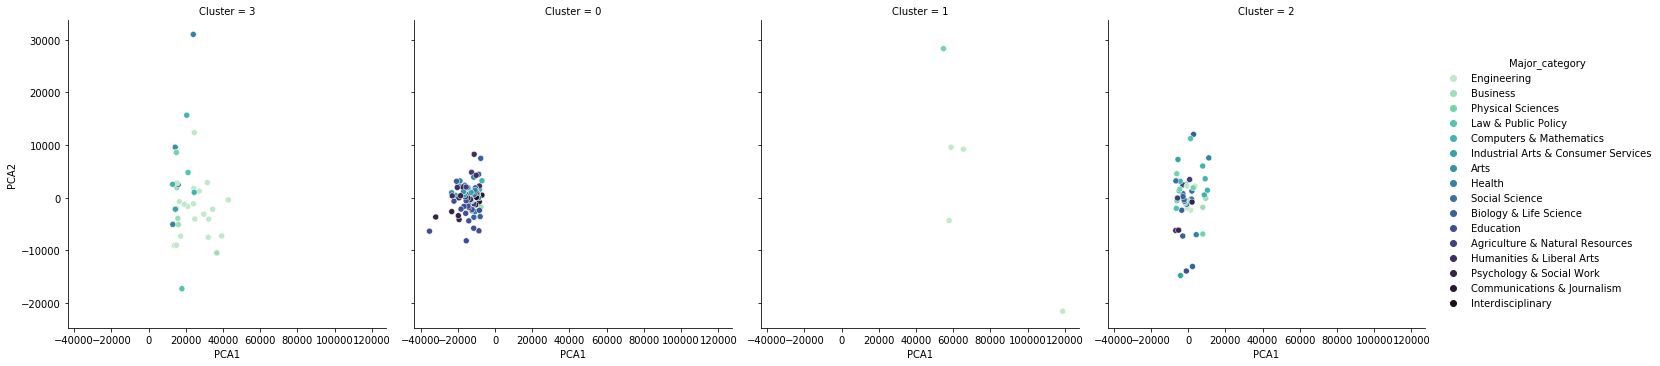

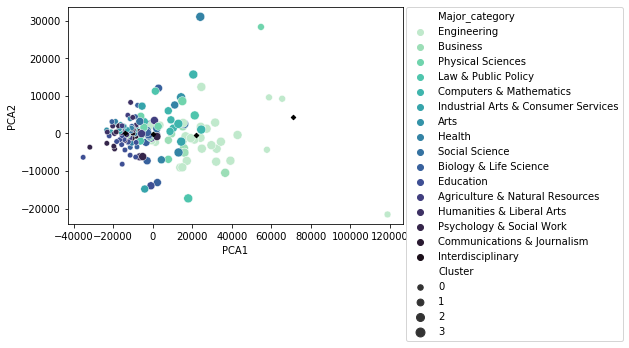

In [58]:

X_df= recent_grads[['Median','P25th','P75th','Unemployment_rate','Grad_premium']] # k = 2 or 4

from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(X_df)                        
X_2D = pca.transform(X_df)

recent_grads['PCA1'] = X_2D[:, 0]
recent_grads['PCA2'] = X_2D[:, 1]

from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=4, random_state=833)   
kmeans.fit(X_df)                  
y_kmeans = kmeans.predict(X_df)

recent_grads['Cluster'] = y_kmeans
centers = pca.transform(kmeans.cluster_centers_)

sns.relplot("PCA1", "PCA2", data=recent_grads, hue='Major_category', col='Cluster',col_order= [3,0,1,2], palette= pal)
plt.show();

sns.scatterplot("PCA1", "PCA2", data=recent_grads, hue='Major_category', size= 'Cluster', sizes=(30,80), palette = pal);


plt.scatter(centers[:, 0], centers[:, 1], color='black', s=10, marker='D')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show();





## Cluster of 3 using 'ShareWomen','Low_wage_jobs_per','College_jobs_per', and 'Non_college_jobs_per'

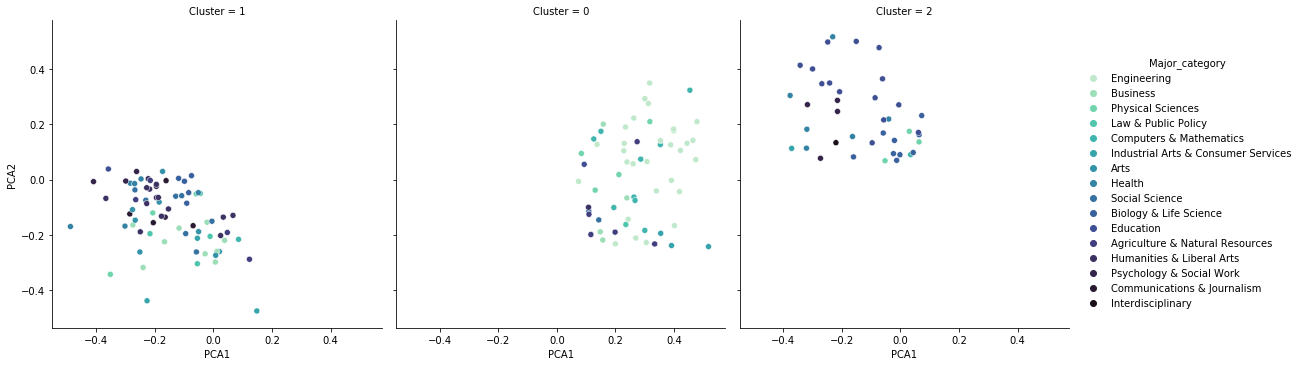

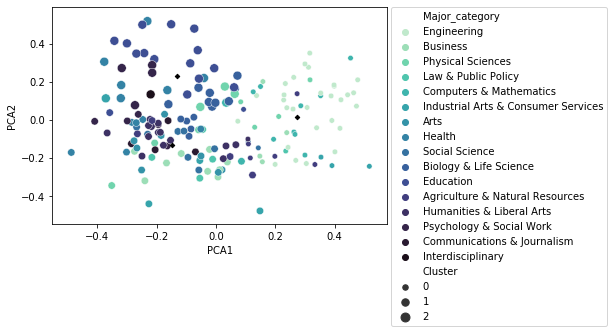

In [59]:

X_df= recent_grads[['ShareWomen','Low_wage_jobs_per','College_jobs_per','Non_college_jobs_per']]  
# k= 2 or 3 

from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(X_df)                        
X_2D = pca.transform(X_df)

recent_grads['PCA1'] = X_2D[:, 0]
recent_grads['PCA2'] = X_2D[:, 1]

from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3, random_state=833)   
kmeans.fit(X_df)                  
y_kmeans = kmeans.predict(X_df)

recent_grads['Cluster'] = y_kmeans
centers = pca.transform(kmeans.cluster_centers_)

sns.relplot("PCA1", "PCA2", data=recent_grads, hue='Major_category', col='Cluster',col_order= [1,0,2], palette= pal)
plt.show();

sns.scatterplot("PCA1", "PCA2", data=recent_grads, hue='Major_category', size= 'Cluster',sizes=(30,80), palette = pal);


plt.scatter(centers[:, 0], centers[:, 1], color='black', s=10, marker='D')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show();

# Scatter plot for number of majors and number of graduates of each major category

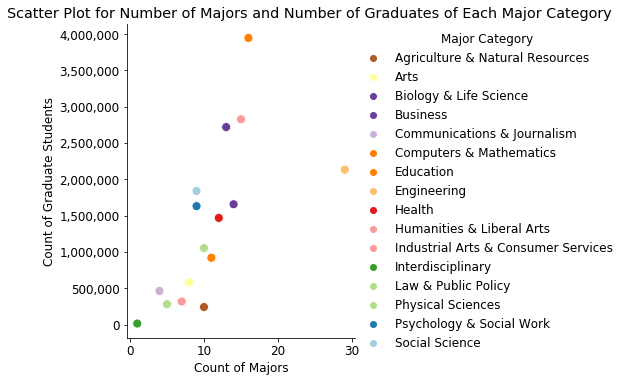

In [60]:
mpl.rcParams['font.size'] = 12  #Change font size

df = pd.DataFrame(grads_students.groupby('Major_category')['Grad_total'].sum())
df2 = pd.DataFrame(grads_students.groupby('Major_category')['Major'].count())
df3 = df.merge(df2, on='Major_category')
g = sns.relplot(x='Major', y='Grad_total', kind='scatter', data=df3, hue='Major_category', palette = 'Paired_r',s=80)
g._legend.set_title('Major Category')

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
    
plt.xlabel('Count of Majors')
plt.ylabel('Count of Graduate Students')
plt.title('Scatter Plot for Number of Majors and Number of Graduates of Each Major Category',x=0.8,y=1.1)
plt.show()

# Median Salary Dispersion

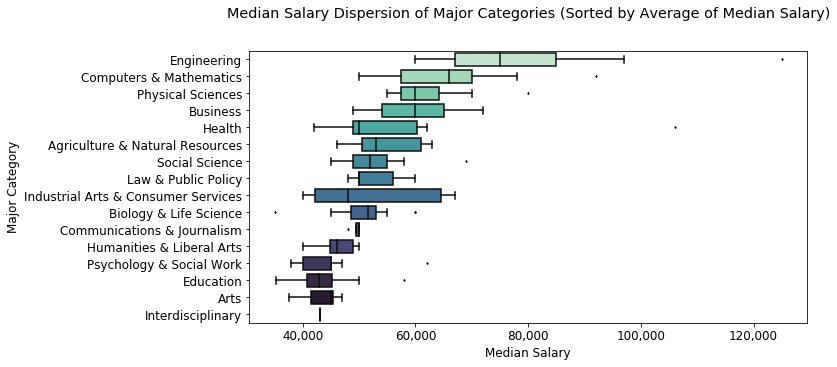

In [61]:
mpl.rcParams['font.size'] = 12  #Change font size
fig, ax = plt.subplots(figsize=(10,5))
label_order = all_ages.groupby('Major_category')['Median'].mean().sort_values(ascending=False).index
sns.boxplot(data=all_ages,y='Major_category',x='Median',linewidth=1.5,fliersize=1.5,order=label_order, palette = pal)
plt.xlabel('Median Salary')
plt.ylabel('Major Category')
plt.title('Median Salary Dispersion of Major Categories (Sorted by Average of Median Salary)',x=0.5,y = 1.1)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)));

# Pie Charts (Low-wage and Non-college Job Percentage)



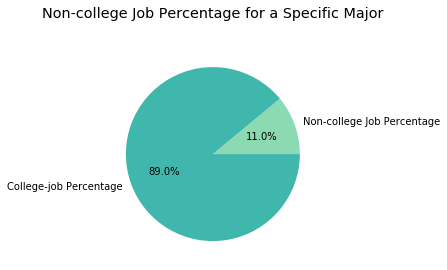

In [62]:
data = recent_grads.loc[recent_grads['Major']=='MATHEMATICS AND COMPUTER SCIENCE']
pie_data = [float(data['Non_college_jobs_Per'].values),float(1-data['Non_college_jobs_Per'].values)]
plt.pie(pie_data,labels=['Non-college Job Percentage','College-job Percentage'],autopct='%1.1f%%',textprops={'size': 'smaller'})
plt.title('Non-college Job Percentage for a Specific Major',y=1.1);

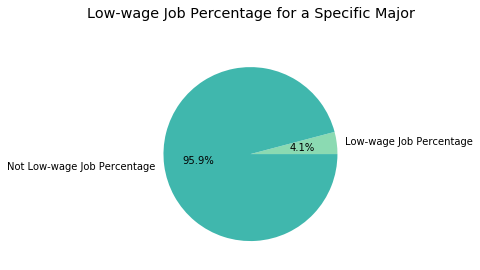

In [63]:
data = recent_grads.loc[recent_grads['Major']=='MATHEMATICS AND COMPUTER SCIENCE']
pie_data = [float(data['Low_wage_jobs_Per'].values),float(1-data['Low_wage_jobs_Per'].values)]
plt.pie(pie_data,labels=['Low-wage Job Percentage','Not Low-wage Job Percentage'],autopct='%1.1f%%',textprops={'size': 'smaller'})
plt.title('Low-wage Job Percentage for a Specific Major',y=1.1);

# Graduate Premium of Median Salary for a Specific Major


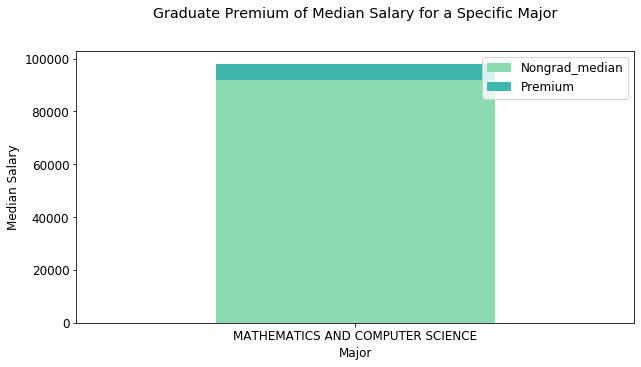

In [64]:
grads_students['Premium'] = grads_students['Grad_median'] - grads_students['Nongrad_median']
math_premium = grads_students[grads_students['Major'] == 'MATHEMATICS AND COMPUTER SCIENCE']
math_premium.set_index("Major", drop=True, inplace=True)

axis = math_premium[["Nongrad_median", "Premium"]].plot(kind="bar", stacked=True)
fig = axis.get_figure()
plt.xlabel('Median Salary')
plt.xticks(rotation = 360)
plt.title('Graduate Premium of Median Salary for a Specific Major',x=0.5, y=1.1)
plt.xlabel('Major')
plt.ylabel('Median Salary')
plt.legend(loc='upper right')
fig.set_size_inches(10, 5)

# Gender Breakdown for a Specific Major

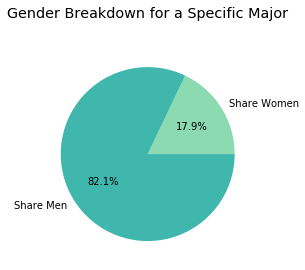

In [65]:
gender = recent_grads.loc[recent_grads['Major']=='MATHEMATICS AND COMPUTER SCIENCE']
pie_data = [float(gender['ShareWomen'].values),float(1-gender['ShareWomen'].values)]
plt.pie(pie_data,labels=['Share Women','Share Men'],autopct='%1.1f%%',textprops={'size': 'smaller'})
plt.title('Gender Breakdown for a Specific Major',y=1.1);

# Unemployment Rate for Specific Major

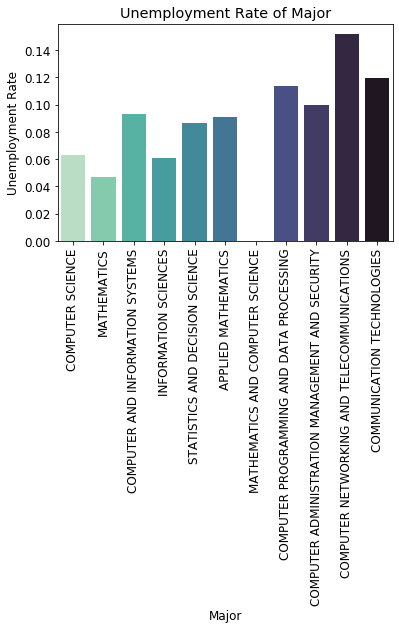

In [66]:
unemp_df = recent_grads.loc[recent_grads['Major_category']=='Computers & Mathematics']

g = sns.barplot(data = unemp_df, x = 'Major', y = 'Unemployment_rate', palette = pal)
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title('Unemployment Rate of Major');
g.set_ylabel('Unemployment Rate');

# Median for Specific Major

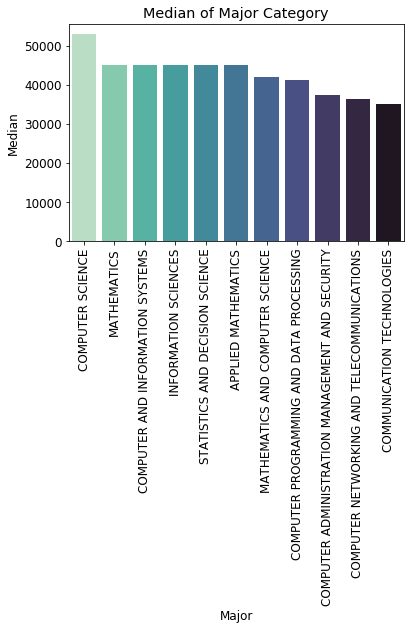

In [67]:
g = sns.barplot(data = unemp_df, x = 'Major', y='Median', palette = pal)
g.set_xticklabels(g.get_xticklabels(),rotation=90);
g.set_title('Median of Major Category');
g.set_ylabel('Median');

# Recommender Function

In [68]:
majors_dict = {'Agriculture' : 'x', 
               'Bio' : 'x', 
               'Eng' : 'x', 
               'Hum' : 'x',
               'Comms & Journal' : 'x',
               'Comp & Math' : 'x', 
               'Industry & Consumer' : 'x',
               'Ed': 'x', 
               'Law':'x',
              'Inter': 'x',
               'H' : 'x',
               'Soc' : 'x',
               'Physical' : 'x',
               'Psych & Soc' : 'x',
               'A' : 'x',
               'Bus' : 'x'              
            }

majors_abbrv = {}
for key, value in zip(majors_dict, all_ages.Major_category.unique()):
    majors_abbrv[key] = value

In [88]:
def recommend_major(major_cat = 'A', major = '', sort = 'Median'):
    significant_columns = ['Major_category', 'Major','P25th','Median','P75th', 'Unemployment_rate','Grad_premium','ShareWomen']
    grad_significant_columns = ['Major_category', 'Major', 'Grad_P25','Grad_median', 'Grad_P75', 'Grad_unemployment_rate', 'Grad_premium','ShareWomen']
    order = list(np.random.choice(['M','U','W','G'],1))[0]
    
    order = input('''What most important criteria? 
    \n(M) - Highest Median Income
    \n(U) - Lowest Unemployment Rate
    \n(W) - Highest Share of Women
    \n(G) - Largest Graduate Premium''').upper()
    
    global l_of_school
    l_of_school = input('''Are you planning on attending bachelor's or graduate level courses? ("B" for Bachelor's, "G" for Graduate, "A" for both)''')
    
    major_cat = input('''Which major categories are you interested in?''')

    
    if l_of_school == 'A':
        df = all_ages[significant_columns]
        
    elif l_of_school == 'B':
        df = recent_grads[significant_columns]        
        
    elif l_of_school == 'G':
        df = grads_students[grad_significant_columns]
        sort = 'Grad_median'
        
    if major != '':
        result = df[df['Major'] == major].sort_values(by=sort, ascending=False)[:5]
    else:
        if ',' in major_cat:
            result = df[df['Major_category'].isin(majors_abbrv[i] for i in [i.strip() for i in major_cat.split(',')])].sort_values(by=sort, ascending=False)[:5]
        else:
            result = df[df['Major_category'] == majors_abbrv[major_cat]].sort_values(by=sort, ascending=False)[:5]
    
    #recommendation = recommendation[['Major','Major_category','Median','Unemployment_rate','ShareWomen']]
    if order == 'M':
        if l_of_school == 'G':
            result.sort_values(by= 'Grad_median', ascending= False, inplace = True)
        else:
            result.sort_values(by= 'Median', ascending= False, inplace = True)
    elif order == 'U':
        if l_of_school == 'G':
            result.sort_values(by= 'Grad_unemployment_rate', ascending= True, inplace = True)
        else:
            result.sort_values(by= 'Unemployment_rate', ascending= True, inplace = True)
    elif order == 'W':
        result.sort_values(by= 'ShareWomen', ascending= False, inplace = True)
    elif order == 'G':
        result.sort_values(by= 'Grad_premium', ascending= False, inplace = True)
    
    
    unemployment1 = 'Unemployment_rate'
    result['ShareWomen'] = pd.Series(["{0:.2f}%".format(val * 100) for val in result['ShareWomen']], index = result.index)
    result['Grad_premium'] = pd.Series(["{0:.2f}%".format(val * 100) for val in result['Grad_premium']], index = result.index)
    if l_of_school == 'G':
        unemployment1 = 'Grad_unemployment_rate'
    result[unemployment1] = pd.Series(["{0:.2f}%".format(val * 100) for val in result[unemployment1]], index = result.index)
    return result

In [71]:
mpl.rcParams['font.size'] = 20
col = ['mistyrose', 'lightsalmon', 'salmon', 'coral', 'tomato', 'orangered', 'r', 'firebrick', 'brown', 'maroon', 'darkred']
col_r = col[::-1]
pie_colors = ['mistyrose', 'tomato']

def index_finder(a):
    for indx, i in enumerate(a):
        if i.get_text() == major1:
            return indx
        
        
def plot_major(major= "MATHEMATICS AND COMPUTER SCIENCE"):
    unemp = 'Unemployment_rate'
    median = 'Median'
    p25 = 'P25th'
    p75 = 'P75th'
    global major1
    major1 = major
    
    if l_of_school == 'A':
        df = all_ages
        
    elif l_of_school == 'B':
        df = recent_grads
        
    elif l_of_school == 'G':
        df = grads_students
        unemp = 'Grad_unemployment_rate' 
        median = 'Grad_median'
        p75 = 'Grad_P75'
        p25 = 'Grad_P25'
        
    
    major_category = df[df['Major'] == major]['Major_category'].values[0]
    
    global major_title
    major_title = major.title()


    fig = plt.figure(constrained_layout=True)

    gs = GridSpec(2, 3, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    # identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
    ax2 = fig.add_subplot(gs[0, 2])
    ax3 = fig.add_subplot(gs[0, 1])
    ax4 = fig.add_subplot(gs[1, 0])
    ax5 = fig.add_subplot(gs[1, 1])
    ax6 = fig.add_subplot(gs[1, 2])

    fig.suptitle(f"Micro-view of {major_category} Major Category",y=1.1)

    fig.set_size_inches(40,30)
    
    
    grads_students['Premium'] = grads_students['Grad_median'] - grads_students['Nongrad_median']
    math_premium = grads_students[grads_students['Major'] == major]
    math_premium.set_index("Major", drop=True, inplace=True)

    unemp_df = df.loc[df['Major_category']==major_category].sort_values(by=unemp , ascending=False)
    ax1.bar(unemp_df['Major'], unemp_df[unemp], tick_label=list(unemp_df['Major']), color = col_r)
    ax1.set_title(f"Unemployment Rate of {major_category}",y=1.1)
    ax1.set_ylabel('Unemployment Rate')
    ax1.set_xticklabels(unemp_df['Major'].values, rotation = 90)
    index = index_finder(ax1.get_xticklabels())
    ax1.get_xticklabels()[index].set_weight("bold")

    me_df = df.loc[df['Major_category']==major_category].sort_values(by=median , ascending=False)
    ax2.bar(me_df['Major'], me_df[p25], color = ['firebrick'])
    ax2.bar(me_df['Major'], me_df[median], color = ['tomato'], bottom = me_df[p25].values)
    ax2.bar(me_df['Major'], me_df[p75], color = ['mistyrose'], bottom = me_df[median].values)
    ax2.set_title(f"Median Salary of {major_category}",y=1.1)
    ax2.set_ylabel('Median')
    ax2.set_xticklabels(me_df['Major'].values, rotation = 90)
    index = index_finder(ax2.get_xticklabels())
    ax2.get_xticklabels()[index].set_weight("bold")
    
    g1 = ax3.bar(data = math_premium, x = 'Major', height = "Nongrad_median", width = .1, color = col_r) # tried to refer to https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/bar_stacked.html without success
    g2 = ax3.bar(data = math_premium, x = 'Major',height = 'Premium' , bottom = 'Nongrad_median', width = .1, color = 'tomato')
    
    ax3.set_title(f'Graduate Premium of Median Salary for {major_title}',y=1.1)
    ax3.set_ylabel('Median Salary')
    ax3.legend(handles=[g2, g1], labels = ['Graduate school premium','Non-grad median'],loc='upper right', bbox_to_anchor=(1.1, 1.05))


   
    mpl.rcParams['font.size'] = 20
    data = recent_grads.loc[recent_grads['Major']==major]
    pie_data = [float(data['Non_college_jobs_Per'].values),float(1-data['Non_college_jobs_Per'].values)]
    ax4.pie(pie_data,autopct='%1.1f%%',textprops={'size': 'large'}, colors = pie_colors)
    ax4.set_title(f'Non-college Job Percentage for {major_title}');
    ax4.legend(labels=['Non-college Job Percentage','College-job Percentage'], loc = 'lower right')
    

    pie_data = [float(data['Low_wage_jobs_Per'].values),float(1-data['Low_wage_jobs_Per'].values)]
    ax5.pie(pie_data,autopct='%1.1f%%',textprops={'size': 'large'}, colors= pie_colors)
    ax5.set_title(f'Low-wage Job Percentage for {major_title}')
    ax5.legend(labels=['Low-wage Job Percentage','Not Low-wage Job Percentage'],loc = 'lower right')    

    
    pie_data = [float(data['ShareWomen'].values),float(1-data['ShareWomen'].values)]
    ax6.pie(pie_data,autopct='%1.1f%%',textprops={'size': 'large'}, colors= pie_colors)
    ax6.set_title(f'Gender Breakdown for {major_title}')
    ax6.legend(labels = ['Women','Men'], loc = 'lower right')


In [72]:
recommend_major()

What most important criteria? 
    
(M) - Highest Median Income
    
(U) - Lowest Unemployment Rate
    
(W) - Highest Share of Women
    
(G) - Largest Graduate Premium M
Are you planning on attending bachelor's or graduate level courses? ("B" for Bachelor's, "G" for Graduate, "A" for both) B
Which major categories are you interested in? A


,Major_category,Major,P25th,Median,P75th,Unemployment_rate,Grad_premium,ShareWomen
32,Arts,MISCELLANEOUS FINE ARTS,25000,50000,66000,0.089375,0.195652,0.410180
95,Arts,COMMERCIAL ART AND GRAPHIC DESIGN,25000,35000,45000,0.096798,0.250000,0.690365
141,Arts,FILM VIDEO AND PHOTOGRAPHIC ARTS,22000,32000,42000,0.105772,0.140000,0.423209
146,Arts,MUSIC,22300,31000,42000,0.075960,0.293103,0.506721
149,Arts,FINE ARTS,21000,30500,41000,0.084186,0.260870,0.667034


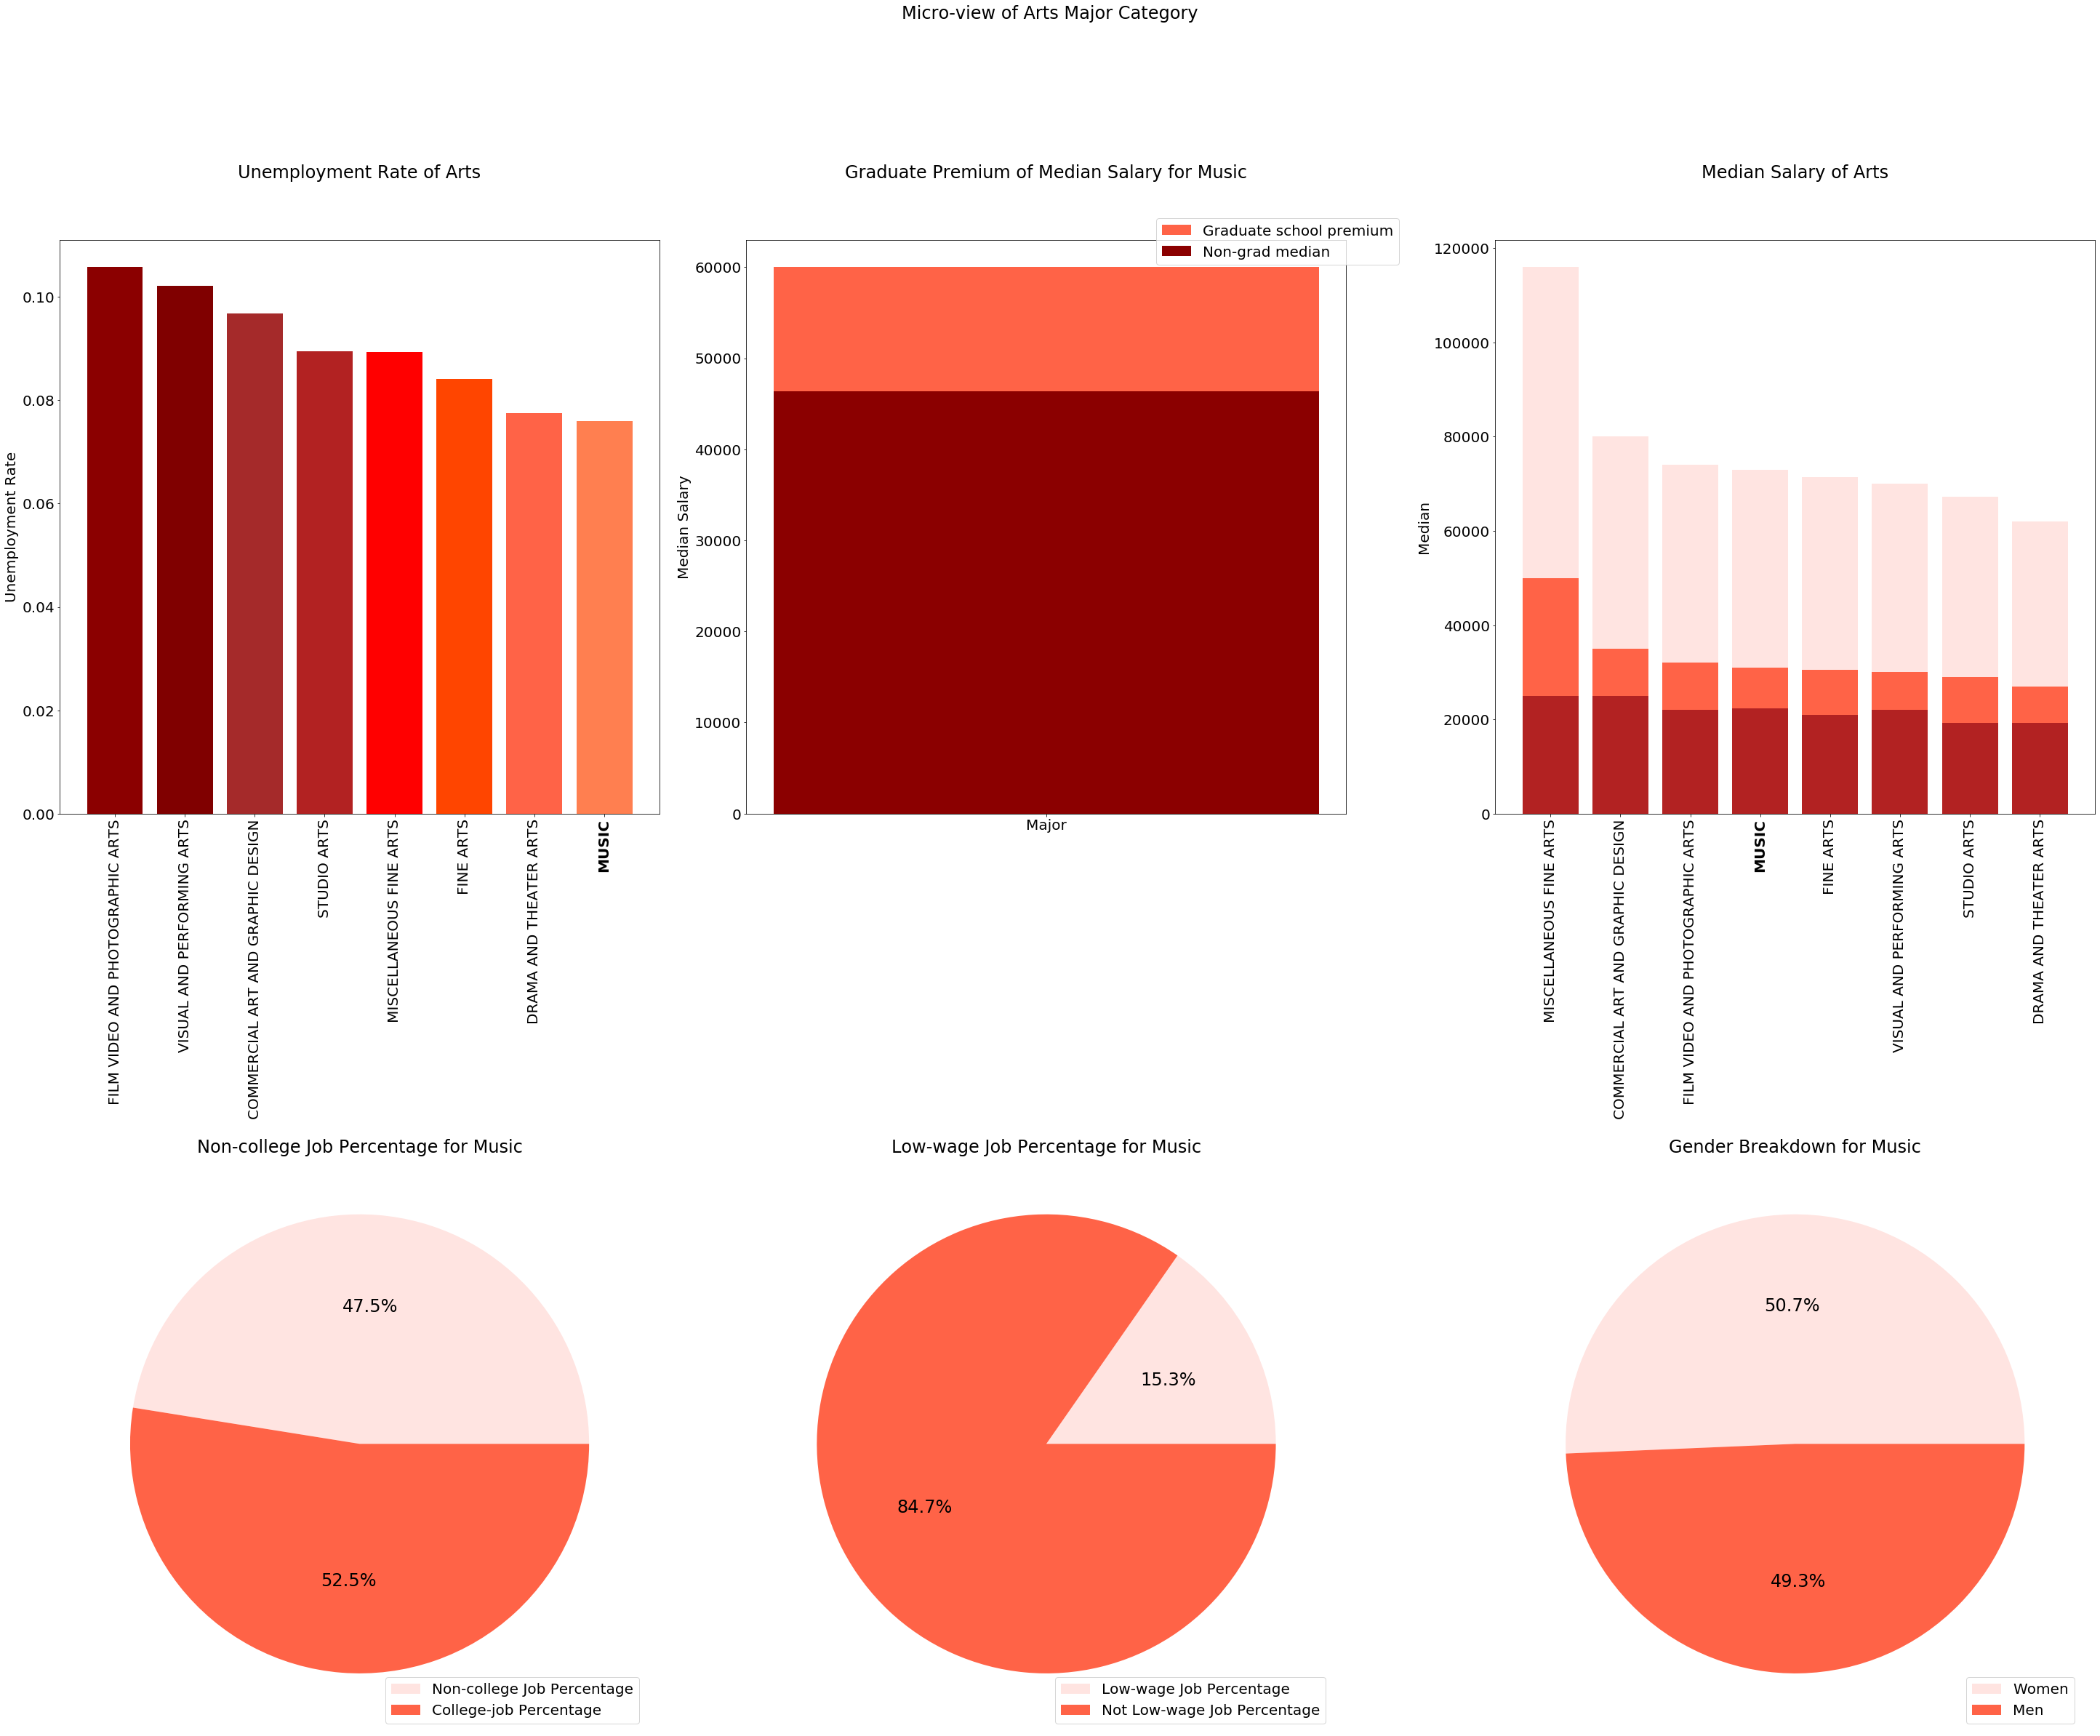

In [73]:
plot_major()